# Open Food Facts : Étude des produits alimentaires

*Analyse approfondi des produits alimentaires via des analyses et des visualisations adaptées aux besoins des professionnels du secteur*  
*Projet Tutoré - Université de Bourgogne (mars 2025)*

---

Ce notebook explore les données d'Open Food Facts, une base de données collaborative et ouverte sur les produits alimentaires du monde entier. Il est conçu pour fournir des informations et des analyses pertinentes aux spécialistes de l'alimentation, en particulier les nutritionnistes, les diététiciens et les professionnels de l'industrie agroalimentaire. Les données disponibles incluent des informations détaillées sur la composition nutritionnelle, les ingrédients, les labels, l'impact environnemental et bien plus encore. Ce notebook a pour but de fournir une interface interactive afin de faciliter l'exploration de ces données."



**Ce notebook contient 4 parties :**

1. **Connexion a la base de données** : Importation des bibliothèques requises pour effectuer les analyses et connexion a la base de données comportant les données Open Food Facts.
2. **Analyse des données** : Analyse de valeurs nutritionnelles, impact environnemental...
3. **Visualisation des données** : Création de graphiques pour illustrer les résultats des analyses.
4. **Modélisation et analyse avancée** : Application de méthodes d'algorithmes d'intelligence artificielle.

### Utilisation :
Le notebook est conçu pour être interactif, permettant aux spécialistes de l'alimentaire de personnaliser les analyses selon leurs besoins. Ils peuvent ajuster les paramètres des requêtes et des visualisations pour obtenir des résultats spécifiques à leurs critères.  
Les données d'Open Food Facts sont une ressource précieuse pour comprendre les tendances de l'alimentation, évaluer la qualité nutritionnelle des produits et analyser l'impact environnemental de notre consommation. Nous utiliserons des visualisations et des analyses statistiques pour mettre en évidence les informations clés.



### 1 - Importation et connexion à la base de données

Tout d'abord, pour exécuter les requêtes d'analyse, il est nécessaire de se connecter à la base de données contenant les informations des produits alimentaires et d'importer les bibliothèques requises.

Les données Open Food Facts sont stockées dans une base de données PostgreSQL et les requêtes seront effectues sur cette base. Les données ont deja ete nettoyes et filtrer lors de l'importation dans la base de données.

In [ ]:
#les librairies a installer 
pip install psycopg2
pip install pandas
pip install scikit-learn
pip install matplotlib
pip install numpy
pip install seaborn  
pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import re
from datetime import datetime
from pandas import Series, DataFrame
%matplotlib inline


In [3]:
import psycopg2
import pandas as pd

# Connexion à la base de données PostgreSQL
try:
    connection = psycopg2.connect( # Remplacez par le nom de votre base
        user="gb232322",                # Utilisateur
        password="gb232322",  # Remplacez par votre mot de passe
        host="kafka",               # Hôte (dans ce cas, "kafka")
        port="5432"                 # Port PostgreSQL par défaut
    )
    print("Connexion réussie à la base de données")
except Exception as e:
    print(f"Erreur lors de la connexion : {e}")

Connexion réussie à la base de données


Ci-dessous un apercu des données d'un produit:

In [17]:
#requete qui affiche le nombre de ligne de la table ProductInfos
query = "SELECT COUNT(*) FROM off_product_infos"
df = pd.read_sql(query, connection)
df.head()

/tmp/ipykernel_661981/1176970461.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count
0,3753262


Notre table ProductInfos contient 3 753 262 lignes.

In [18]:
#requete qui affiche les 5 premières lignes de la table ProductInfos
query = "SELECT * FROM off_product_infos LIMIT 5"
df = pd.read_sql(query, connection)
df.head()

/tmp/ipykernel_661981/3861151703.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,id,code,url,product_name,abbreviated_product_name,generic_name,owner,image_url
0,1,000000000054,http://world-fr.openfoodfacts.org/produit/0000...,Limonade artisanale a la rose,None,None,None,https://images.openfoodfacts.org/images/produc...
1,2,000000000063,http://world-fr.openfoodfacts.org/produit/0000...,Mozzarella Schnittfest Gerieben 45% Fett,None,None,None,https://images.openfoodfacts.org/images/produc...
2,3,000000000114,http://world-fr.openfoodfacts.org/produit/0000...,Chocolate n 3,None,None,None,https://images.openfoodfacts.org/images/produc...
3,4,00000001,http://world-fr.openfoodfacts.org/produit/0000...,Poulet fermier,None,None,None,https://images.openfoodfacts.org/images/produc...
4,5,0000000105,http://world-fr.openfoodfacts.org/produit/0000...,Paleta gran reserva - Sierra nevada,None,None,None,https://images.openfoodfacts.org/images/produc...


In [22]:
#requete qui affiche les 5 premières lignes de la table off_brands_infos
query = "SELECT * FROM off_brands_infos LIMIT 5"
df = pd.read_sql(query, connection)
df.head()

/tmp/ipykernel_661981/1240036014.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,id,brands_tags,brand_owner
0,2,gut-gunstig,None
1,3,jeff-de-bruges,None
2,4,nortembio,None
3,5,advocare,None
4,6,lakanto,None


Il est possible de consulter le contenu des autres tables, il suffit de remplacer le nom de la table dans la requête ci-dessus :  
 **query = "SELECT * FROM nom_de_la_table LIMIT nb_ligne"**.  
Les tables disponibles dans la base de données sont les suivantes:  
### 1. **product_infos**
   Cette table contient des informations de base sur les produits alimentaires.
   - **code**
   - **url**
   - **product_name**
   - **abbreviated_product_name**
   - **generic_name**
   - **owner**
   - **image_url**

### 2. **brands_infos**
   Cette table regroupe des informations sur les marques.
   - **brands_tags**
   - **brand_owner**

### 3. **metadata_infos**
   Contient des informations sur la création et la modification des données.
   - **creator**
   - **created_datetime**
   - **last_modified_datetime**
   - **last_modified_by**
   - **last_updated_datetime**
   - **last_image_datetime**

### 4. **nova_infos**
   Détient des informations concernant la classification NOVA des produits alimentaires.
   - **nova_group**
   - **pnns_groups_1**
   - **pnns_groups_2**

### 5. **environmental_infos**
   Contient des données environnementales, notamment les scores d'impact écologique.
   - **environmental_score_grade**
   - **environmental_score_score**
   - **carbon_footprint_100g**
   - **carbon_footprint_from_meat_or_fish_100g**

### 6. **nutritional_infos**
   Informations sur la qualité nutritionnelle des produits alimentaires.
   - **nutriscore_grade**
   - **nutriscore_score**

### 7. **categories**
   Contient des informations sur les catégories alimentaires.
   - **categories_tags**

### 8. **origins**
   Détient des informations sur l'origine des produits.
   - **origins_tags**

### 9. **labels**
   Contient des informations sur les labels des produits.
   - **labels_tags**

### 10. **purchase_places**
   Cette table contient des informations sur les lieux d'achat des produits.
   - **countries_fr**

### 11. **ingredients**
   Contient des informations sur les ingrédients des produits.
   - **ingredients_tags**

### 12. **ingredients_anal**
   Donne des détails sur l'analyse des ingrédients.
   - **ingredients_analysis_tags**

### 13. **packaging**
   Contient des informations sur l'emballage des produits.
   - **packaging_tags**

### 14. **nutrient_tags**
   Détient des informations sur les niveaux de nutriments.
   - **nutrient_levels_tags**

### 15. **allergens**
   Informations sur les allergènes présents dans les produits.
   - **allergens**

### 16. **traces**
   Contient des informations sur les traces d'autres substances dans les produits.
   - **traces_tags**

### 17. **additives**
   Informations sur les additifs présents dans les produits.
   - **additives_tags**

### 18. **food_groups**
   Cette table regroupe des informations sur les groupes alimentaires.
   - **food_groups_tags**

### 19. **nutritional_values**
   Contient des informations détaillées sur la composition nutritionnelle des produits.
   - energy_kj_100g, energy_kcal_100g, energy_100g, energy_from_fat_100g, fat_100g, saturated_fat_100g, butyric_acid_100g, caproic_acid_100g, caprylic_acid_100g, capric_acid_100g, lauric_acid_100g, myristic_acid_100g, palmitic_acid_100g, stearic_acid_100g, arachidic_acid_100g, behenic_acid_100g, lignoceric_acid_100g, cerotic_acid_100g, montanic_acid_100g, melissic_acid_100g, unsaturated_fat_100g, monounsaturated_fat_100g, omega_9_fat_100g, polyunsaturated_fat_100g, omega_3_fat_100g, omega_6_fat_100g, alpha_linolenic_acid_100g, eicosapentaenoic_acid_100g, docosahexaenoic_acid_100g, linoleic_acid_100g, arachidonic_acid_100g, gamma_linolenic_acid_100g, dihomo_gamma_linolenic_acid_100g, oleic_acid_100g, elaidic_acid_100g, gondoic_acid_100g, mead_acid_100g, erucic_acid_100g, nervonic_acid_100g, trans_fat_100g, cholesterol_100g, carbohydrates_100g, sugars_100g, added_sugars_100g, sucrose_100g, glucose_100g, fructose_100g, lactose_100g, maltose_100g, maltodextrins_100g, starch_100g, polyols_100g, erythritol_100g, fiber_100g, soluble_fiber_100g, insoluble_fiber_100g, proteins_100g, casein_100g, serum_proteins_100g, nucleotides_100g, salt_100g, added_salt_100g, sodium_100g, alcohol_100g, vitamin_a_100g, beta_carotene_100g, vitamin_d_100g, vitamin_e_100g, vitamin_k_100g, vitamin_c_100g, vitamin_b1_100g, vitamin_b2_100g, vitamin_pp_100g, vitamin_b6_100g, vitamin_b9_100g, folates_100g, vitamin_b12_100g, biotin_100g, pantothenic_acid_100g, silica_100g, bicarbonate_100g, potassium_100g, chloride_100g, calcium_100g, phosphorus_100g, iron_100g, magnesium_100g, zinc_100g, copper_100g, manganese_100g, fluoride_100g, selenium_100g, chromium_100g, molybdenum_100g, iodine_100g, caffeine_100g, taurine_100g, ph_100g, fruits_vegetables_nuts_100g, fruits_vegetables_nuts_dried_100g, fruits_vegetables_nuts_estimate_100g, fruits_vegetables_nuts_estimate_from_ingredients_100g, collagen_meat_protein_ratio_100g, cocoa_100g, chlorophyl_100g, glycemic_index_100g, water_hardness_100g, choline_100g, phylloquinone_100g, beta_glucan_100g, inositol_100g, carnitine_100g, sulphate_100g, nitrate_100g, acidity_100g

---

## Analyse Nutritionelle


Cette section se concentre sur l'analyse des valeurs nutritionnelles des produits. Nous examinerons la distribution des **macronutriments** (lipides, glucides, protéines), la teneur en vitamines et minéraux, et la présence de composants spécifiques tels que les acides gras, les sucres ajoutés et les fibres.

### Rappel des valeurs nutritionnelles disponibles

Vous trouverez ci-dessous un apercu des valeurs nutritionnelles disponibles dans cette base de données. Pour modifier les requêtes et analyser d'autres nutriments, il suffit de copier-coller le nom correspondant en veillant à conserver l'orthographe et les majuscules/minuscules.

In [25]:
#requete qui affiche les 5 premières lignes de la table off_nutritional_values
query = "SELECT * FROM off_nutritional_values LIMIT 5"
df = pd.read_sql(query, connection)
df.head()

/tmp/ipykernel_661981/755756657.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,id,energy_kj_100g,energy_kcal_100g,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,butyric_acid_100g,caproic_acid_100g,caprylic_acid_100g,...,glycemic_index_100g,water_hardness_100g,choline_100g,phylloquinone_100g,beta_glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
0,1,NaN,NaN,NaN,None,NaN,NaN,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2,NaN,332.0,1389.0,None,25.0,17.3,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,3,2415.0,NaN,2415.0,None,44.0,28.0,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4,NaN,NaN,NaN,None,NaN,NaN,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,5,NaN,NaN,NaN,None,NaN,NaN,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### Distribution des macronutriments

Une première requête consiste à analyser la distribution des macronutriments au sein d'un groupe de produits, afin de comparer les quantités de macronutriments présentes dans chaque groupe.

In [39]:
#Calculer la moyenne et la mediane des lipides, glucides et proteines pour chaque categorie de produit
query = """
SELECT 
    c.categories_tags AS category,
    AVG(nv.fat_100g) AS avg_fat,
    AVG(nv.carbohydrates_100g) AS avg_carbohydrates,
    AVG(nv.proteins_100g) AS avg_proteins,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY nv.fat_100g) AS median_fat,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY nv.carbohydrates_100g) AS median_carbohydrates,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY nv.proteins_100g) AS median_proteins
FROM off_product_infos p
JOIN off_nutritional_values nv ON p.id = nv.id
JOIN off_categories c ON p.id = c.id
GROUP BY c.categories_tags;
"""
df = pd.read_sql(query, connection)
df.head(10)

/tmp/ipykernel_661981/589421573.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,category,avg_fat,avg_carbohydrates,avg_proteins,median_fat,median_carbohydrates,median_proteins
0,af:fusilli,1.882116,67.011508,12.446999,1.6,70.5,12.0
1,am:shield,NaN,NaN,NaN,NaN,NaN,NaN
2,ar:0,NaN,NaN,NaN,NaN,NaN,NaN
3,ar:08002660030108,NaN,NaN,NaN,NaN,NaN,NaN
4,ar:092222,NaN,NaN,NaN,NaN,NaN,NaN
5,ar:1,NaN,NaN,NaN,NaN,NaN,NaN
6,ar:١,NaN,NaN,NaN,NaN,NaN,NaN
7,ar:10,NaN,NaN,NaN,NaN,NaN,NaN
8,ar:١٠٠٪,NaN,NaN,NaN,NaN,NaN,NaN
9,ar:100g,0.400000,NaN,4.600000,0.4,NaN,4.6


In [45]:
#affiche les 10 additifs les plus utilisés dans les produits
query = """
SELECT additives_tags, COUNT(*) AS count
FROM off_additives
WHERE additives_tags IS NOT NULL
GROUP BY additives_tags
ORDER BY count DESC
LIMIT 10;
"""
df1 = pd.read_sql(query, connection)
df1

/tmp/ipykernel_661981/977097421.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query, connection)


,additives_tags,count
0,en:e330,188769
1,en:e322,125368
2,en:e322i,105402
3,en:e500,79109
4,en:e415,66249
5,en:e471,59754
6,en:e202,54654
7,en:e500ii,54420
8,en:e412,54189
9,en:e450,42708


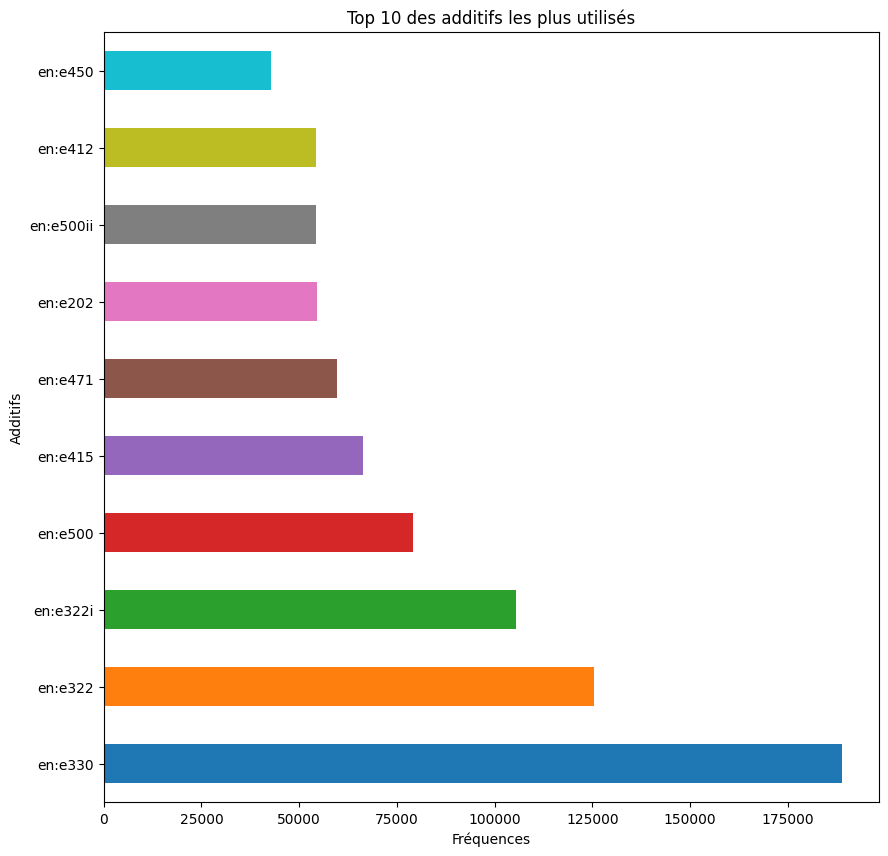

In [50]:
#affiche un histogramme des resultats de la requete precedente avec les additifs sur l'axe des x et le nombre d'utilisation sur l'axe des y
colors = plt.cm.tab10(range(len(df1))) 
df1.plot(kind='barh', x='additives_tags', y='count', legend=None, figsize=(10, 10), color=colors)
plt.xlabel('Fréquences')
plt.ylabel('Additifs')
plt.title('Top 10 des additifs les plus utilisés')
plt.show()

Dans la visualisation, on remarque donc que l'additif E330 est présent plus de 175 000 fois dans les produits de nos données alimentaires, alors que l'additif E450 n'est présent qu'à peu près 40 000 fois, car l'additif E330 (acide citrique) est largement utilisé comme conservateur et régulateur d'acidité dans de nombreux produits alimentaires courants, tels que les boissons, les confiseries et les produits transformés, tandis que E450 (pyrophosphate) est principalement utilisé dans des produits plus spécifiques, comme les viandes transformées et les produits de la mer, ce qui explique sa présence moins fréquente dans l'ensemble des produits analysés.  

Ces résultats sont confirmés par les informations disponibles sur le site [Évolution de l'utilisation des additifs alimentaires](https://www.anses.fr/fr/content/evolution-de-lutilisation-des-additifs-alimentaires-dans-les-produits-transformes), qui indique que l’acide citrique (E330) et les lécithines (E322) sont présents dans un grand nombre de produits transformés.



In [63]:


#affiche la moyenne des sucres par origines 
query = """
SELECT o.countries_fr, nv.sugars_100g
FROM off_product_infos p
JOIN off_nutritional_values nv ON p.id = nv.id
JOIN off_purchase_places o ON p.id = o.id
LIMIT 100;
"""
df3= pd.read_sql(query, connection)


# Vérifier à nouveau les premières lignes
print(df3.head(10))

/tmp/ipykernel_661981/2058681430.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3= pd.read_sql(query, connection)


  countries_fr  sugars_100g
0        Monde          NaN
1       France        13.50
2      Irlande          NaN
3      Irlande          NaN
4       Canada        22.50
5       Italie          NaN
6        Maroc          NaN
7      Espagne        21.49
8       France         1.00
9        Monde          NaN


In [62]:
#affiche la moyenne des sucres par origines 
query = """
SELECT 
    o.countries_fr AS country,
    AVG(nv.sugars_100g) AS avg_sugars
FROM off_product_infos p
JOIN off_nutritional_values nv ON p.id = nv.id
JOIN off_purchase_places o ON p.id = o.id
WHERE nv.sugars_100g IS NOT NULL
GROUP BY o.countries_fr
ORDER BY avg_sugars DESC;
"""
df2 = pd.read_sql(query, connection)

# Forcer l'affichage des décimales avec pd.set_option
#d.set_option('display.float_format', '{:.2f}'.format)
pd.reset_option('display.float_format')


# Vérifier à nouveau les premières lignes
print(df2.head(10))

/tmp/ipykernel_661981/2974144701.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query, connection)


                  country    avg_sugars
0                  France  1.422972e+27
1                 Hongrie  8.816797e+13
2                    Oman  6.027033e+09
3                   Maroc  9.336654e+02
4  en:indian-subcontinent  8.000000e+01
5              Angleterre  7.106602e+01
6     en:brazil-en-france  6.800000e+01
7                   Tonga  6.500000e+01
8              ca:argelia  6.300000e+01
9                    it:a  6.300000e+01


### Teneur en sucres ajoutés

In [66]:
#affiche la distribution de la quantité de sucres ajoutés dans toutes les catégories de produits
query = """
SELECT 
    c.categories_tags AS category,
    nv.added_sugars_100g AS added_sugars
FROM off_product_infos p
JOIN off_nutritional_values nv ON p.id = nv.id
JOIN off_categories c ON p.id = c.id
WHERE nv.added_sugars_100g IS NOT NULL;
"""
df4 = pd.read_sql(query, connection)
df4.head(10)

/tmp/ipykernel_661981/423311986.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query, connection)


,category,added_sugars
0,en:sweet-snacks,7.14
1,en:snacks,7.14
2,en:crackers,6.45
3,en:peanut-filled,6.45
4,en:pretzel,6.45
5,en:appetizers,6.45
6,en:salty-snacks,6.45
7,en:snacks,6.45
8,en:plant-based-foods-and-beverages,0.00
9,en:pastas,0.00


In [68]:
#affiche la distribution de la quantité de sucres ajoutés dans toutes les catégories de produits
query = """
SELECT 
    i.ingredients_tags AS ingredient,
    COUNT(*) AS count
FROM off_ingredients i
WHERE i.ingredients_tags IS NOT NULL
GROUP BY i.ingredients_tags
ORDER BY count DESC
LIMIT 10;
"""
df4 = pd.read_sql(query, connection)
df4.head(10)

/tmp/ipykernel_661981/3806287189.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query, connection)


,ingredient,count
0,en:salt,542735
1,en:added-sugar,525378
2,en:disaccharide,472357
3,en:sugar,447464
4,en:water,383608
5,en:oil-and-fat,383208
6,en:flavouring,368120
7,en:vegetable-oil-and-fat,357162
8,en:vegetable,345216
9,en:dairy,291007


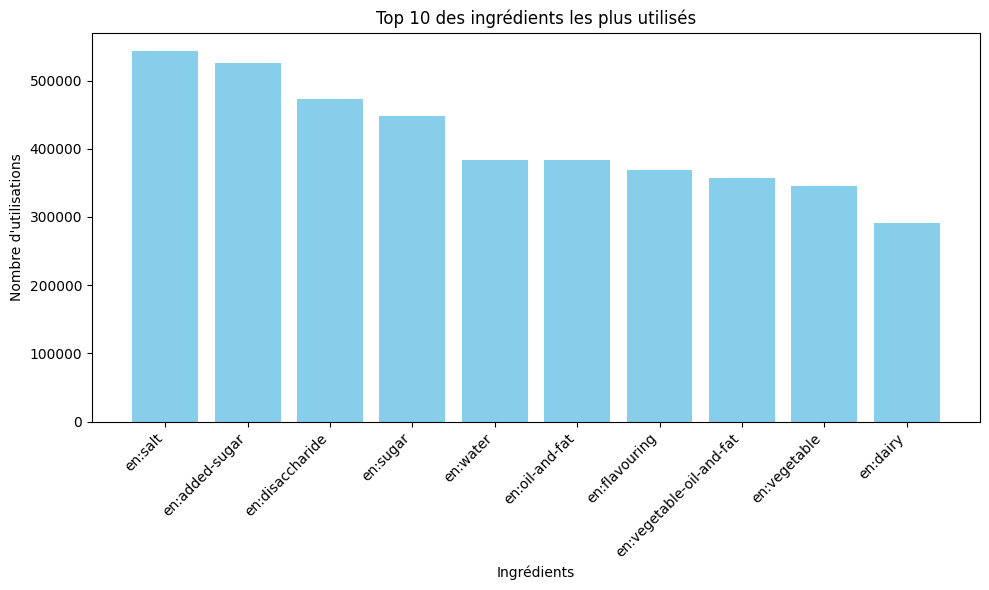

In [69]:
# Créer un bar chart
plt.figure(figsize=(10, 6))
plt.bar(df4['ingredient'], df4['count'], color='skyblue')
plt.xlabel('Ingrédients')
plt.ylabel('Nombre d\'utilisations')
plt.title('Top 10 des ingrédients les plus utilisés')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()

On observe que l'ingrédient le plus fréquemment utilisé est le sel, présent dans plus de 500 000 produits alimentaires. Viennent ensuite les sucres ajoutés, les glucides, le sucre, l'eau, et d'autres. Cela met en évidence l'utilisation généralisée du sel et des sucres dans une grande variété de produits alimentaires, ce qui soulève des préoccupations majeures pour la santé publique. Il devient donc essentiel de promouvoir des choix alimentaires équilibrés et conscients pour préserver la santé des consommateurs.

In [88]:
#affiche la distribution de la quantité de sucres ajoutés dans toutes les catégories de produits
query = """
SELECT 
    b.brands_tags AS brand,
    ROUND(AVG(nv.sugars_100g), 2) AS avg_sugars
FROM off_product_infos p
JOIN off_nutritional_values nv ON p.id = nv.id
JOIN off_brands_infos b ON p.id = b.id
WHERE nv.sugars_100g IS NOT NULL
GROUP BY b.brands_tags
HAVING AVG(nv.sugars_100g) <= 10
ORDER BY avg_sugars DESC
LIMIT 20;
"""
df6 = pd.read_sql(query, connection)
df6.head(20)

/tmp/ipykernel_661981/649254697.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6 = pd.read_sql(query, connection)


,brand,avg_sugars
0,agros-nova-soki-sp-z-o-o,10.0
1,agriculture-eu,10.0
2,activia-san-lactose,10.0
3,agropen,10.0
4,advance-nutrition,10.0
5,active-life,10.0
6,absorb-plus,10.0
7,1st,10.0
8,agribiologica,10.0
9,🤩🤩🤩,10.0


On peut verifier pour quelques une de ces marques leurs nutri-score. Par exemple nous pouvons verifier pour les marques **7-Fjell**, **9Hylls** et **Agropen**.

In [ ]:
#affiche la marque et les Nutri-Score associes à quelques-uns de leurs produits
query = """
SELECT 
    b.brands_tags AS brand,
    p.product_name AS product,
    nv.nutriscore_grade,
    nv.nutriscore_score
FROM off_product_infos p
JOIN off_nutritional_infos nv ON p.id = nv.id
JOIN off_brands_infos b ON p.id = b.id
WHERE b.brands_tags IN ('agropen', '9hylls', '7-fjell');
"""
df7 = pd.read_sql(query, connection)
df7.head()

/tmp/ipykernel_661981/960740848.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df7 = pd.read_sql(query, connection)


,brand,product,nutriscore_grade,nutriscore_score
0,7-fjell,Bergen Julemarked Julebrus,e,11
1,7-fjell,Julebrus,e,11
2,9hylls,9Hylls caramel,c,5
3,agropen,Piña,a,4


**7-Fjell** est une marque de bière artisanale originaire de Norvège. Il est donc normal que ce type de produit ait un Nutri-Score E, car la bière contient de l'alcool, du sucre et manque de nutriments bénéfiques tels que les fibres et les protéines. L'alcool, en particulier, est un facteur pénalisant dans le calcul du Nutri-Score, tout comme la teneur en sucre. Ces éléments influencent négativement le score nutritionnel du produit.  

En ce qui concerne **9Hylls**, il s'agit d'une marque de pudding allemande. Le Nutri-Score de ces produits est généralement faible en raison de leur forte teneur en sucre, un critère clé dans le calcul du Nutri-Score. Les puddings, étant souvent des desserts sucrés, contiennent des niveaux élevés de sucre ajouté, ce qui peut expliquer un score nutritionnel défavorable.  

Enfin, pour **Agropen**, la marque propose des ananas. Ce type de produit, étant un fruit frais, bénéficie naturellement d'un Nutri-Score A, en raison de sa faible teneur en calories, de son absence de graisses saturées et de sucre ajouté, ainsi que de sa richesse en fibres et en vitamines. Les fruits frais sont classés parmi les meilleurs produits du point de vue nutritionnel.

Identification des produits riches en nutriments spécifiques:  

Rechercher les produits ou catégories de produits riches en fer ou calcium pour aider les personnes souffrant de carences en ces nutriments. Cela vous permettra de recommander des produits qui compensent les déficits nutritionnels.

In [9]:
#affiche catégories les plus fréquentes parmi les produits ayant une teneur en fer supérieure à 5g/100g, les 10 catégories les plus fréquentes
query = """
WITH top_categories AS (
    SELECT 
        c.categories_tags AS category,
        COUNT(*) AS category_count
    FROM off_product_infos p
    JOIN off_nutritional_values nv ON p.id = nv.id
    JOIN off_categories c ON p.id = c.id
    WHERE nv.iron_100g > 5
    GROUP BY c.categories_tags
    ORDER BY category_count DESC
    LIMIT 10
)
SELECT 
    c.categories_tags AS category,
    p.product_name AS product_name,
    nv.iron_100g AS iron_content
FROM off_product_infos p
JOIN off_nutritional_values nv ON p.id = nv.id
JOIN off_categories c ON p.id = c.id
WHERE nv.iron_100g > 5
  AND c.categories_tags IN (SELECT category FROM top_categories)
ORDER BY c.categories_tags, nv.iron_100g DESC;
"""
df8 = pd.read_sql(query, connection)
df8.head(10)

/tmp/ipykernel_727154/838477654.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df8 = pd.read_sql(query, connection)


,category,product_name,iron_content
0,en:breakfast-cereals,SanoVita Musli cu fructe,28.80
1,en:breakfast-cereals,Cao Ball,12.29
2,en:breakfast-cereals,Special K Red Berries,11.00
3,en:breakfast-cereals,Nesqwik АЛФАВИТ,10.60
4,en:breakfast-cereals,Céréales Nesquik Au Goût Chocolat,10.40
5,en:breakfast-cereals,All-Bran Original,8.80
6,en:breakfast-cereals,MINI COOKIES,8.50
7,en:breakfast-cereals,Kellogg's Tresor Dark Choco,8.00
8,en:breakfast-cereals,Cereal farcits de xoco,7.00
9,en:breakfast-cereals,Choco Shells,7.00


On observe que parmi les 10 catégories les plus fréquentes parmi les produits riches en fer, les **céréales pour le petit-déjeuner** se distinguent par une teneur en fer particulièrement élevée. Cette catégorie domine clairement la liste, ce qui indique qu’elle est largement enrichie en fer. 

Cela suggère que les **céréales pour le petit-déjeuner** pourraient constituer une solution nutritionnelle importante pour répondre aux besoins en fer des populations susceptibles de souffrir de carences, telles que les enfants, les femmes enceintes ou les personnes âgées.

En outre, cette tendance met en lumière l'importance de l'enrichissement des produits alimentaires dans cette catégorie, afin de soutenir une alimentation équilibrée et prévenir les carences en fer.


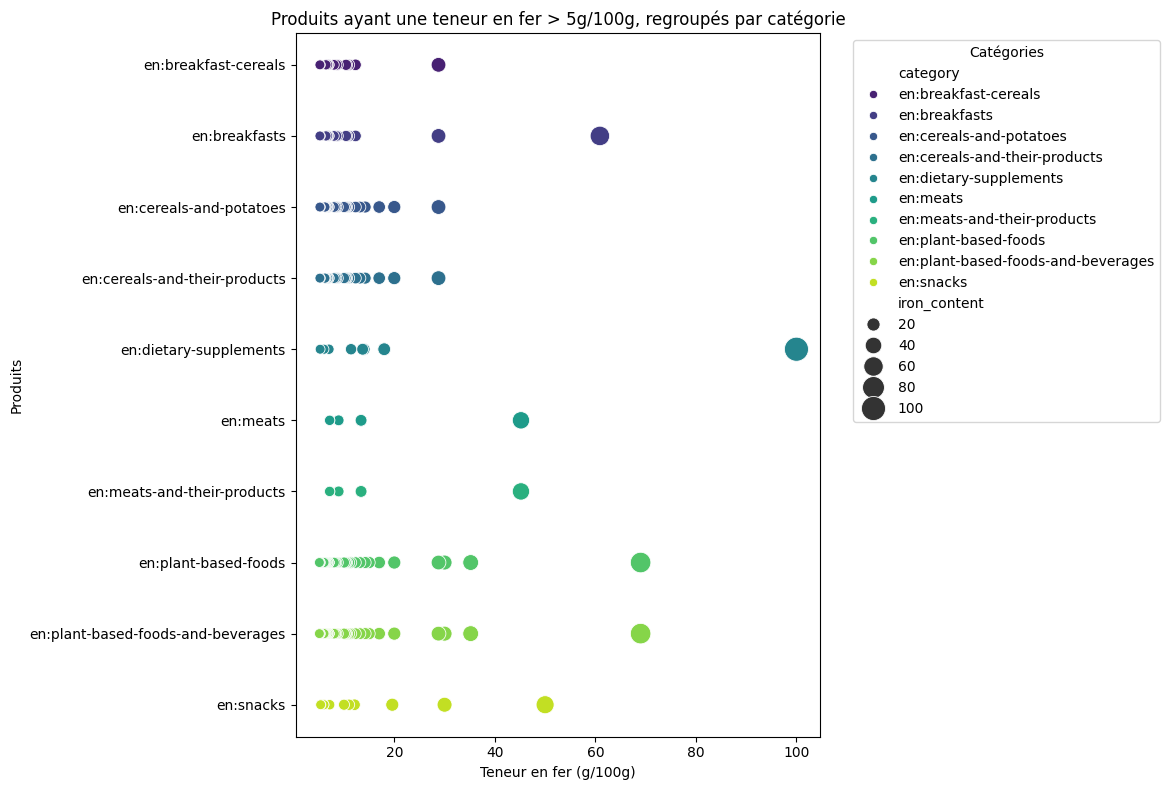

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df8, x='iron_content', y='category', hue='category', size='iron_content', sizes=(50, 300), palette='viridis')
plt.xlabel('Teneur en fer (g/100g)')
plt.ylabel('Produits')
plt.title('Produits ayant une teneur en fer > 5g/100g, regroupés par catégorie')
plt.legend(title='Catégories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Cette visualisation met en évidence la répartition des produits ayant une teneur en fer supérieure à 5 g pour 100 g, regroupés par catégorie. On observe que les compléments alimentaires (« dietary supplements ») se démarquent nettement avec la teneur en fer la plus élevée, atteignant près de 100 g/100 g, ce qui reflète leur forte concentration en nutriments. 

Les catégories « plant-based foods », « plant-based foods and beverages » ainsi que certains « snacks » présentent également des teneurs relativement élevées, allant jusqu’à 60 à 70 g/100 g pour certains produits. À l’inverse, les catégories telles que les céréales, les petits-déjeuners et leurs dérivés affichent des teneurs plus modérées, bien qu’il soit possible d’y retrouver quelques produits enrichis.

La taille des bulles, représentant la quantité de fer, permet de visualiser rapidement les produits les plus riches au sein de chaque catégorie. Enfin, la diversité des couleurs facilite l’identification des différentes catégories. Ce graphique permet ainsi d’identifier rapidement les types d’aliments les plus riches en fer.


### Matrice de corrélation des valeurs nutritionnelles

La matrice de corrélation que vous trouverez ci-dessous met en évidence les liens entre les différents nutriments. Par exemple, elle vous permettra de voir si les produits riches en matières grasses ont tendance à être également riches en calories, ou si les produits faibles en fibres sont souvent riches en sucres. En analysant ces relations, vous pourrez identifier des modèles nutritionnels, évaluer l'équilibre des produits et, surtout, formuler des recommandations nutritionnelles personnalisées et basées sur des données probantes.

Pour calculer la matrice de corrélation nous avons sélectionner des indicateurs clés comme les lipides, les glucides, les proteines, les fibres, le sel, le sucre et l'énergie. Ils representent les principaux macronutriments et permettent d'identifier les relations importantes entre les nutriments. 

Vous pouvez modifier ou ajouter des colonnes à la requête si vous le souhaitez.

/tmp/ipykernel_727154/148495704.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


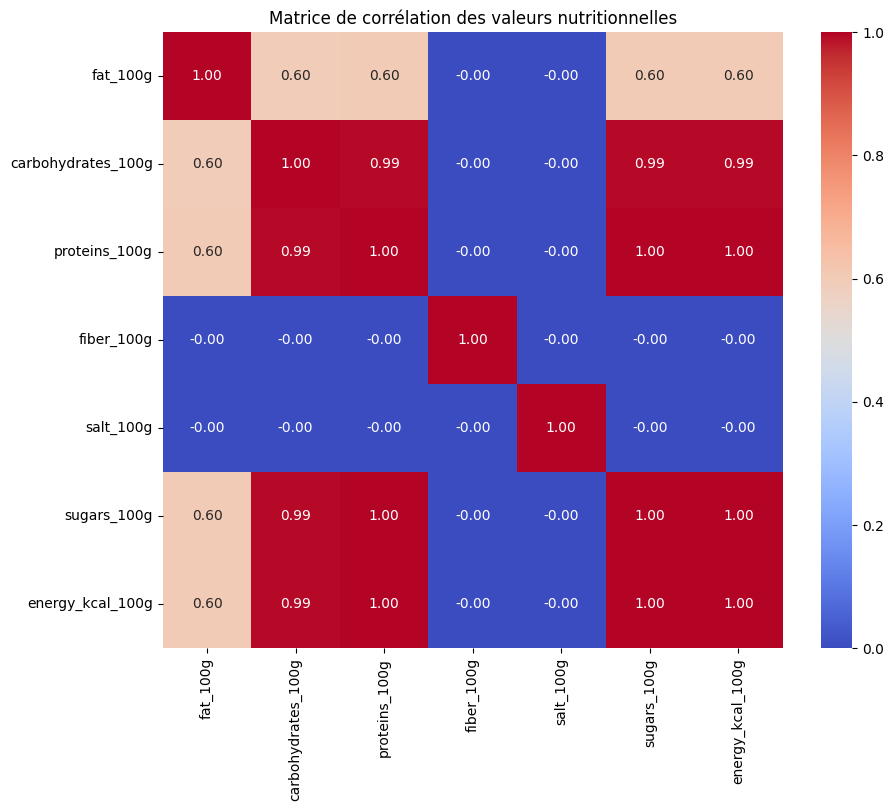

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Requête SQL pour récupérer les données nutritionnelles
query = """
SELECT fat_100g, carbohydrates_100g, proteins_100g, fiber_100g, salt_100g, sugars_100g, energy_kcal_100g
FROM off_nutritional_values
WHERE fat_100g IS NOT NULL
  AND carbohydrates_100g IS NOT NULL
  AND proteins_100g IS NOT NULL
  AND fiber_100g IS NOT NULL
  AND salt_100g IS NOT NULL
  AND sugars_100g IS NOT NULL
  AND energy_kcal_100g IS NOT NULL;
"""
df = pd.read_sql(query, connection)

# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des valeurs nutritionnelles')
plt.show()

On observe des corrélations cohérentes, notamment une forte corrélation entre `carbohydrates_100g` et `sugars_100g`. Les sucres étant une sous-catégorie des glucides, cette corrélation élevée est attendue. De même, les corrélations significatives entre `energy_kcal_100g` et `fat_100g`, `carbohydrates_100g`, `proteins_100g` sont logiques, ces trois macronutriments étant les principaux contributeurs à l'apport calorique.

Cependant, certaines valeurs de corrélation peuvent sembler anormales. Cela pourrait s'expliquer par la présence d'un nombre important de valeurs manquantes ou par une faible variance dans certaines colonnes, ce qui peut impacter la fiabilité du calcul des coefficients de corrélation.



Ci-dessous un aperçu de la proportion de valeurs manquantes dans les données concernant des valeurs nutritionnelles spécifiques.

In [15]:


# Requête SQL pour récupérer les données nutritionnelles
query = """
SELECT 
    COUNT(*) AS total_rows,
    SUM(CASE WHEN proteins_100g IS NULL THEN 1 ELSE 0 END) AS missing_proteins,
    SUM(CASE WHEN sugars_100g IS NULL THEN 1 ELSE 0 END) AS missing_sugars,
    SUM(CASE WHEN carbohydrates_100g IS NULL THEN 1 ELSE 0 END) AS missing_carbohydrates,
    SUM(CASE WHEN energy_kcal_100g IS NULL THEN 1 ELSE 0 END) AS missing_energy_kcal
FROM off_nutritional_values;
"""
df9 = pd.read_sql(query, connection)
df9.head()


/tmp/ipykernel_727154/184750650.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df9 = pd.read_sql(query, connection)


,total_rows,missing_proteins,missing_sugars,missing_carbohydrates,missing_energy_kcal
0,3753262,996558,1096548,997226,1018166


Nous constatons entre 25 et 30 % de valeurs manquantes dans ces colonnes.

 Nous allons a présent réaliser des requêtes d'analyses sur le nutri-score afin de mesurer la qualité nutritionnelle des aliments et avoir une évaluation précise de leur impact sur la santé, en tenant compte des critères tels que la teneur en matières grasses, en sucre, en sel, ainsi que la présence de nutriments bénéfiques comme les fibres et les protéines.

---

## Impact Environnemental 

Cette section explore les données relatives à l'impact environnemental des produits, notamment le score environnemental, l'empreinte carbone et les informations sur les ingrédients d'origine animale. Nous analyserons les tendances et les différences entre les catégories de produits.  
Ces analyses vous permettront de pouvoir intégrer ces considérations dans vos futures recommandations pour promouvoir si vous le souhaitez des choix alimentaires bénéfiques à la fois pour la santé et l'environnement.

#### Distribution des scores environmentaux

Où se situe la France en termes de scores environnementaux par rapport aux autres nations ?  

Tout d'abord, vérifions les 10 origines les plus fréquentes des produits en fonction de leur occurrence dans les produits alimentaires.

In [18]:
#affiche le nombre d'occurence de chaque origine des produits
query = """
SELECT 
    origins_tags AS origin,
    COUNT(*) AS count
FROM off_origins
WHERE origins_tags IS NOT NULL
GROUP BY origins_tags
ORDER BY count DESC
LIMIT 10;
"""
df10 = pd.read_sql(query, connection)
df10

/tmp/ipykernel_727154/3479536583.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df10 = pd.read_sql(query, connection)


,origin,count
0,en:france,40625
1,en:italy,10734
2,en:european-union,8307
3,en:spain,7772
4,en:germany,6660
5,en:united-states,3968
6,en:mexico,3552
7,en:united-kingdom,3053
8,en:argentina,2501
9,en:brazil,2490


On constate que la majorité des produits proviennent de France. Les trois principales origines sont la France, l'Italie et l'Union Européenne.

Nous nous concentrerons sur ces trois origines: **France**, **l'Italie** et **l'Union Europeenne** pour les analyses suivantes.

In [24]:
#distribution des grades environnementaux par origine
query = """
SELECT 
    o.origins_tags AS origin,
    p.product_name AS product_name,
    e.environmental_score_grade AS environmental_grade
FROM off_product_infos p
JOIN off_environmental_infos e ON p.id = e.id
JOIN off_origins o ON p.id = o.id
WHERE o.origins_tags IN ('en:france', 'en:italy', 'en:european-union')
ORDER BY o.origins_tags, e.environmental_score_grade;
"""
df11 = pd.read_sql(query, connection)
df11

/tmp/ipykernel_727154/2065796590.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df11 = pd.read_sql(query, connection)


,origin,product_name,environmental_grade
0,en:european-union,sugo alle olive,a
1,en:european-union,Grand Arôme 32% de Cacao,a
2,en:european-union,Maes Honey - Miel de fleurs en pot de 3 Kg,a
3,en:european-union,Le fresche biscottate,a
4,en:european-union,Gnocchi chèvre epinard,a
...,...,...,...
59661,en:italy,DIVELLA Arroz Arbório Divella Italiano,None
59662,en:italy,"Spirali, PASTA ITALIANA",None
59663,en:italy,Queso Gorgonzola,None
59664,en:italy,Farfalline,None


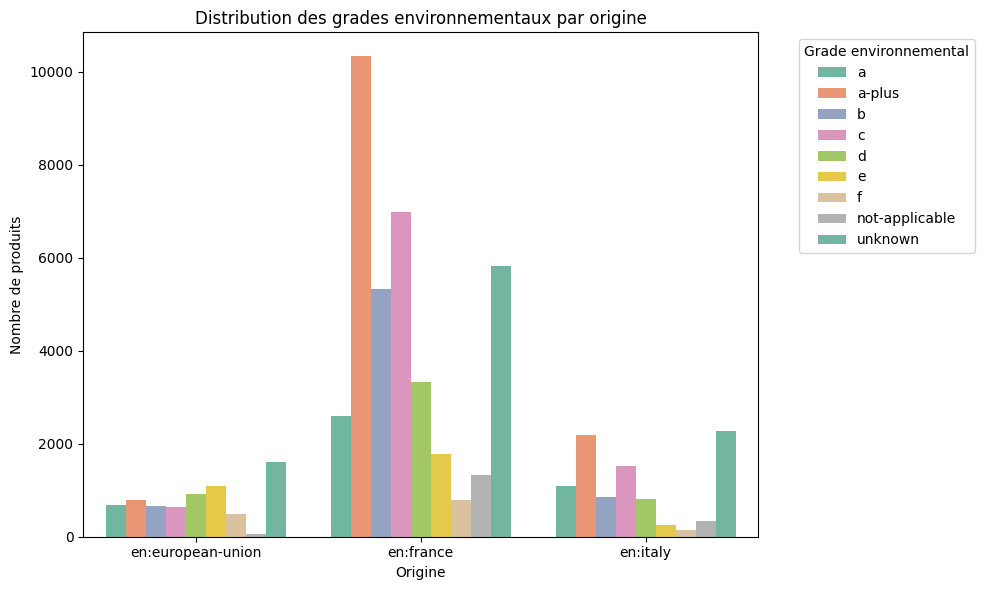

In [21]:
# Créer un countplot pour visualiser la distribution des grades environnementaux par origine
plt.figure(figsize=(10, 6))
sns.countplot(data=df11, x='origin', hue='environmental_grade', palette='Set2')
plt.xlabel('Origine')
plt.ylabel('Nombre de produits')
plt.title('Distribution des grades environnementaux par origine')
plt.legend(title='Grade environnemental', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

On remarque que la France se distingue par une forte concentration de produits classés **A-plus**, suivis des grades **C**, **B** et **D**. Cette tendance peut refléter une meilleure catégorisation ou un plus grand nombre de produits référencés avec un étiquetage environnemental avancé. Le nombre élevé de produits en **A-plus** est particulièrement notable (plus de 10 000 produits), ce qui peut indiquer soit une réelle meilleure performance environnementale des produits français, soit un biais de saisie ou de disponibilité des données.

L'Italie, en revanche, présente une répartition plus équilibrée entre les différents grades, avec une part importante de produits notés **A**, **A-plus** et **C**, mais globalement moins de produits référencés par rapport à la France. Il est également intéressant de noter un nombre non négligeable de produits dont le grade est "**unknown**", ce qui peut traduire un manque de données ou une absence de labellisation.

Enfin, l'Union européenne affiche une répartition plus dispersée entre les différents grades, avec toutefois une prédominance relative des grades **D** et **unknown**.


In [26]:
#affiche les 10 produits ayant les scores environnementaux les plus eleves(impact environnemental negatif)
query = """
SELECT 
    p.product_name AS product_name,
    e.environmental_score_score AS environmental_score,
    e.carbon_footprint_100g AS carbon_footprint
FROM off_product_infos p
JOIN off_environmental_infos e ON p.id = e.id
WHERE e.environmental_score_score IS NOT NULL
ORDER BY e.environmental_score_score DESC
LIMIT 10;
"""
df12 = pd.read_sql(query, connection)
df12

/tmp/ipykernel_727154/1491999655.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df12 = pd.read_sql(query, connection)


,product_name,environmental_score,carbon_footprint
0,Lindahl's Kvarg - saveur framboise,99,None
1,Yaourts à la grecque 4 Vanille 4 Coco 4 Citron,99,None
2,Olives dénoyautées à la grecque et à l'huile d...,99,None
3,Vinaigre balsamique,99,None
4,Yaourt a la cerise avec morceaux,99,None
5,Fraise Charlotte Barquette 250g X 16,99,None
6,Fromage blanc nature 0% MG,99,None
7,Vinaigre de Modène balsamique,99,None
8,"Semoule De Millet 2,5kg",99,None
9,Pomme de terre,99,None


In [34]:
#comparaison des empreintes carbones entre produits contenant de la viande/poisson et ceux qui n'en contiennent pas
query = """
SELECT 
    product_name,
    carbon_footprint_from_meat_or_fish_100g
FROM off_environmental_infos e
JOIN off_product_infos p ON e.id = p.id
WHERE carbon_footprint_from_meat_or_fish_100g IS NOT NULL
ORDER BY carbon_footprint_from_meat_or_fish_100g DESC;
"""
df14 = pd.read_sql(query, connection)
df14

/tmp/ipykernel_727154/2337753239.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df14 = pd.read_sql(query, connection)


,product_name,carbon_footprint_from_meat_or_fish_100g
0,Saucisses fumées,656298.600
1,Steaks haches 100% pur boeuf,35800.000
2,KNACKS,12232.200
3,Langue de Bœuf Sauce piquante,10740.000
4,Carpaccio,6802.000
...,...,...
12718,Tuiles apéritives goût Poulet braisé,0.294
12719,Colombo de porc et riz basmati,0.205
12720,Royco soep kip,0.196
12721,Royco Minute Soepen Veloute Gevogelte (doos 20...,0.049


L'analyse de cette liste met en évidence une grande différence dans les valeurs d'empreinte carbone associées aux produits à base de viande ou de poisson. D'un côté, certains produits, comme les saucisses fumées et les steaks hachés 100% pur bœuf, affichent des valeurs exceptionnellement élevées (respectivement 656298,6 et 35800), mettant en lumière l'impact significatif de leur production sur les émissions de gaz à effet de serre. D'autre côté, des produits tels que les KNACKS et la langue de bœuf sauce piquante, présentent également des valeurs considérables (12232,2 et 10740), tandis que le carpaccio, avec une empreinte de 6802,0, indique un impact modéré mais toujours important. En revanche, certains produits, comme les tuiles apéritives goût poulet braisé, le colombo de porc avec riz basmati, et les soupes Royco, montrent des valeurs d'empreinte carbone très faibles, voire nulles, en raison de la faible contribution de la viande ou du poisson à leur composition, suggérant ainsi un impact environnemental négligeable, voire inexistant, de ces ingrédients.


---

## Utilisation de techniques de machine learning

Ces analyses permettent de fournir des prédictions sur les données.

Par exemple, nous avons beaucoup de valeur manquante pour les Nutri-Score, nous pouvons donc le prédire. Pour cela, nous allons utiliser des caractéristiques spécifiques tel certaines valeur nutritionnel.

Preparation des données:

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


# Charger les données dans un DataFrame
query = """
SELECT 
    p.product_name AS product_name,
    ni.nutriscore_grade AS nutriscore_grade,
    nv.proteins_100g AS proteins_100g,
    nv.sugars_100g AS sugars_100g,
    nv.carbohydrates_100g AS carbohydrates_100g,
    nv.energy_kcal_100g AS energy_kcal_100g,
    nv.fat_100g AS fat_100g,
    nv.fiber_100g AS fiber_100g,
    nv.saturated_fat_100g AS saturated_fat_100g,
    nv.salt_100g AS salt_100g
FROM off_product_infos p
JOIN off_nutritional_infos ni ON p.id = ni.id
JOIN off_nutritional_values nv ON p.id = nv.id;
"""

# Charger les données
df15 = pd.read_sql(query, connection)

# Vérifier les valeurs uniques de nutriscore_grade
print("Valeurs uniques avant nettoyage :", df15['nutriscore_grade'].unique())

# Nettoyer les données : conserver uniquement les Nutri-Scores valides
valid_scores = ['a', 'b', 'c', 'd', 'e']
df15_train = df15[df15['nutriscore_grade'].isin(valid_scores)]

# Vérifier les valeurs après nettoyage
print("Valeurs uniques après nettoyage :", df15_train['nutriscore_grade'].unique())

# Séparer les produits avec et sans Nutri-Score
df15_predict = df15[df15['nutriscore_grade'].isna()]  # Produits sans Nutri-Score


# Sélectionner les colonnes pertinentes
features = ['proteins_100g', 'sugars_100g', 'carbohydrates_100g', 'energy_kcal_100g', 
            'fat_100g', 'fiber_100g', 'saturated_fat_100g', 'salt_100g']
X = df15_train[features]
y = df15_train['nutriscore_grade']

# Remplacer les valeurs manquantes par la moyenne
X = X.fillna(X.mean())
X_predict = df15_predict[features].fillna(X.mean())

/tmp/ipykernel_740380/2019759701.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df15 = pd.read_sql(query, connection)


Valeurs uniques avant nettoyage : ['not-applicable' 'e' 'unknown' 'd' None 'b' 'c' 'a']
Valeurs uniques après nettoyage : ['e' 'd' 'b' 'c' 'a']


In [ ]:

# Charger les données dans un DataFrame
query = """
SELECT 
    ni.nutriscore_grade AS nutriscore_grade,
    COUNT(*) AS count
FROM off_nutritional_infos ni
WHERE ni.nutriscore_grade IS NOT NULL
GROUP BY ni.nutriscore_grade
ORDER BY count DESC;
"""

# Charger les données
df15 = pd.read_sql(query, connection)
df15.head()

/tmp/ipykernel_740380/224464235.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df15 = pd.read_sql(query, connection)


,nutriscore_grade,count
0,unknown,2408775
1,e,349472
2,d,313810
3,c,254586
4,a,173953


Entrainement du modèle:

In [10]:
# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle Random Forest
#model = RandomForestClassifier(random_state=42)
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Évaluer le modèle
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

/home/hammani/Documents/ProjetTutore/mon_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hammani/Documents/ProjetTutore/mon_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hammani/Documents/ProjetTutore/mon_env/lib/python3.12/site-packages/sklearn/metrics/_classificatio

              precision    recall  f1-score   support

           a       0.32      0.00      0.00     34825
           b       0.00      0.00      0.00     28985
           c       0.19      0.01      0.02     50939
           d       0.00      0.00      0.00     62472
           e       0.29      1.00      0.44     69943

    accuracy                           0.29    247164
   macro avg       0.16      0.20      0.09    247164
weighted avg       0.17      0.29      0.13    247164



/home/hammani/Documents/ProjetTutore/mon_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Prédiction:

In [11]:
# Prédire les Nutri-Scores pour les produits sans Nutri-Score
df15_predict['predicted_nutriscore_grade'] = model.predict(X_predict)

# Afficher les résultats
print(df15_predict[['product_name', 'predicted_nutriscore_grade']])

        product_name predicted_nutriscore_grade
9               None                          e
74              None                          e
81              None                          e
126             None                          e
183             None                          e
...              ...                        ...
3753122         None                          e
3753205         None                          e
3753210         None                          e
3753216         None                          e
3753251         None                          e

[24300 rows x 2 columns]


/tmp/ipykernel_740380/1542757409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15_predict['predicted_nutriscore_grade'] = model.predict(X_predict)


Visualisation des résultats:

/tmp/ipykernel_740380/3914372671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df15_predict, x='predicted_nutriscore_grade', palette='Set2')


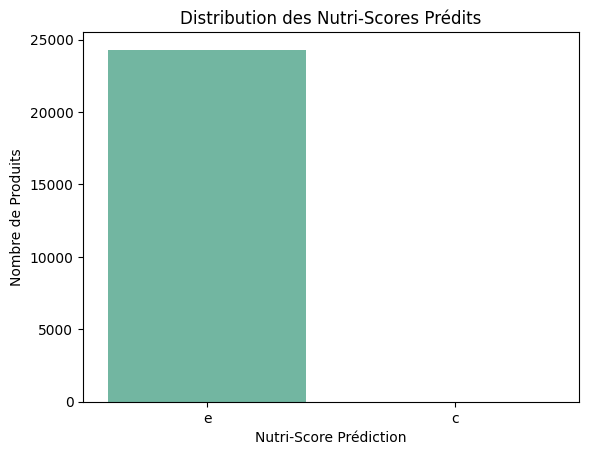

In [12]:
# Visualiser la distribution des Nutri-Scores prédits
sns.countplot(data=df15_predict, x='predicted_nutriscore_grade', palette='Set2')
plt.xlabel('Nutri-Score Prédiction')
plt.ylabel('Nombre de Produits')
plt.title('Distribution des Nutri-Scores Prédits')
plt.show()

In [15]:
print(df15_train['nutriscore_grade'].unique())

['e' 'd' 'b' 'c' 'a']


### Fermeture connexion base de Données

In [25]:
#fermeture connexion à la base de données
connection.close()
print("Connexion fermée")

Connexion fermée
